In [253]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

In [258]:
df_PP = pd.read_csv('peerParticipants.csv', keep_default_na=False)
df_MP = pd.read_csv('mgmtPublics.csv', keep_default_na=False)
df_MF = pd.read_csv('mgmtFacilities.csv', keep_default_na=False)

In [265]:
df_MF

,id,approved,name,type,website,clli,rencode,npanxx,address1,address2,city,state,zipcode,country,notes
0,1,Y,Equinix Ashburn (DC1-DC11),Equinix,http://www.equinix.com/,ASBNVA,EQABVA,703-723,21715 Filigree Ct,Building F,Ashburn,VA,20147-6205,US,
1,2,Y,Digital Realty San Francisco (200 Paul),"Digital Realty Trust, Inc.",http://www.e200paul.com/,SNFCCA,,415-822,200 Paul Ave,,San Francisco,CA,94110,US,
2,3,Y,Telehouse New York Broadway,Telehouse America,http://www.telehouse.net,NYCMNY,,212-785,25 Broadway,,New York,NY,10004-1010,US,
3,4,Y,Equinix Dallas (DA1),Equinix,http://www.equinix.com/,DLLSTX,EQDLTX,214-782,1950 N Stemmons Fwy,Ste 1034,Dallas,TX,75207-3137,US,
4,5,Y,Equinix Palo Alto (SV8),Equinix,http://www.equinix.com/,PLALCA,PXPACA,650-617,529 Bryant St,,Palo Alto,CA,94301-1704,US,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,2487,Y,TelecityGroup Warsaw (PLIX),TelecityGroup,http://www.telecitygroup.com/european-data-cen...,,,,Al. Jerozolimskie 65/79,,Warszawa,,00-697,PL,
1885,2488,Y,System-Net HDC 1,System-Net,,,,,125 rue de la sariette,,Saint Aunes,,34130,FR,
1886,2489,Y,Webmasters Lda Datacenter,Webmasters Lda Datacenter,http://www.domains.co.mz,,,,Av.Malhangalene 787 1st Floor,,Maputo,,,MZ,
1887,2490,N,Poznan University of Economics,Poznan University of Economics,http://www.ue.poznan.pl/,,,,PowstaÅ„cÃ³w Wielkopolskich 16,,Poznan,,61-895,PL,


In [266]:
df_merge = pd.merge(left=df_MF,right=df_MP, how='outer', left_on='id', right_on='id')
#df_merge.to_csv('check.csv')


In [324]:
df_merge_all = pd.merge(left=df_merge,right=df_PP, how='outer', left_on='id', right_on='id')
df_merge_all.to_csv('New_Master.csv')
df_merge_all

,id,approved_x,name_x,type,website_x,clli,rencode,npanxx,address1,address2,...,info_ipv6,policy_url,policy_general,policy_locations,policy_ratio,policy_contracts,policy_nopublic,policy_noprivate,date_created,date_lastupdated
0,1,Y,Equinix Ashburn (DC1-DC11),Equinix,http://www.equinix.com/,ASBNVA,EQABVA,703-723,21715 Filigree Ct,Building F,...,1,http://www.gtt.net/peering/,Restrictive,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2014-06-13 11:36:43
1,2,Y,Digital Realty San Francisco (200 Paul),"Digital Realty Trust, Inc.",http://www.e200paul.com/,SNFCCA,,415-822,200 Paul Ave,,...,1,,Open,Not Required,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-22 13:49:31
2,3,Y,Telehouse New York Broadway,Telehouse America,http://www.telehouse.net,NYCMNY,,212-785,25 Broadway,,...,,http://peering.dal.net,Open,Preferred,No,Not Required,N,N,2004-07-28 00:00:00,2015-01-23 15:40:44
3,4,Y,Equinix Dallas (DA1),Equinix,http://www.equinix.com/,DLLSTX,EQDLTX,214-782,1950 N Stemmons Fwy,Ste 1034,...,1,http://www.as22822.net/,Selective,Required - US,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-30 16:41:06
4,5,Y,Equinix Palo Alto (SV8),Equinix,http://www.equinix.com/,PLALCA,PXPACA,650-617,529 Bryant St,,...,1,https://extranet-es.swisscom.com/ipplus/doc/BI...,Selective,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2015-12-15 08:47:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9082,9301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,N,N,2015-12-31 13:51:16,
9083,9302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,N,N,2015-12-31 19:58:17,
9084,9303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,N,N,2016-01-01 10:57:37,
9085,9304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,N,N,2016-01-02 00:09:57,


In [325]:
len(df_merge_all['asn'].unique())

5630

In [326]:
df_merge_all = df_merge_all.replace([np.nan, ''], 0)
df_merge_all.asn

0        4436
1       20940
2       31800
3       22822
4        3303
        ...  
9082        0
9083        0
9084        0
9085        0
9086        0
Name: asn, Length: 9087, dtype: object

In [330]:
x = df_merge_all["asn"] != 0
df_master = df_merge_all[x]
df_master

,id,approved_x,name_x,type,website_x,clli,rencode,npanxx,address1,address2,...,info_ipv6,policy_url,policy_general,policy_locations,policy_ratio,policy_contracts,policy_nopublic,policy_noprivate,date_created,date_lastupdated
0,1,Y,Equinix Ashburn (DC1-DC11),Equinix,http://www.equinix.com/,ASBNVA,EQABVA,703-723,21715 Filigree Ct,Building F,...,1,http://www.gtt.net/peering/,Restrictive,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2014-06-13 11:36:43
1,2,Y,Digital Realty San Francisco (200 Paul),"Digital Realty Trust, Inc.",http://www.e200paul.com/,SNFCCA,0,415-822,200 Paul Ave,0,...,1,0,Open,Not Required,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-22 13:49:31
2,3,Y,Telehouse New York Broadway,Telehouse America,http://www.telehouse.net,NYCMNY,0,212-785,25 Broadway,0,...,0,http://peering.dal.net,Open,Preferred,No,Not Required,N,N,2004-07-28 00:00:00,2015-01-23 15:40:44
3,4,Y,Equinix Dallas (DA1),Equinix,http://www.equinix.com/,DLLSTX,EQDLTX,214-782,1950 N Stemmons Fwy,Ste 1034,...,1,http://www.as22822.net/,Selective,Required - US,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-30 16:41:06
4,5,Y,Equinix Palo Alto (SV8),Equinix,http://www.equinix.com/,PLALCA,PXPACA,650-617,529 Bryant St,0,...,1,https://extranet-es.swisscom.com/ipplus/doc/BI...,Selective,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2015-12-15 08:47:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9070,9289,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Private Only,N,N,2015-12-26 19:08:41,2015-12-31 11:52:34
9072,9291,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-28 09:13:21,2015-12-30 06:29:08
9073,9292,0,0,0,0,0,0,0,0,0,...,0,0,Selective,Not Required,No,0,N,N,2015-12-28 14:02:09,2015-12-28 16:04:14
9078,9297,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-29 21:44:03,2015-12-31 13:39:24


Text(0.5, 1.0, 'Table of Different Label Counts')

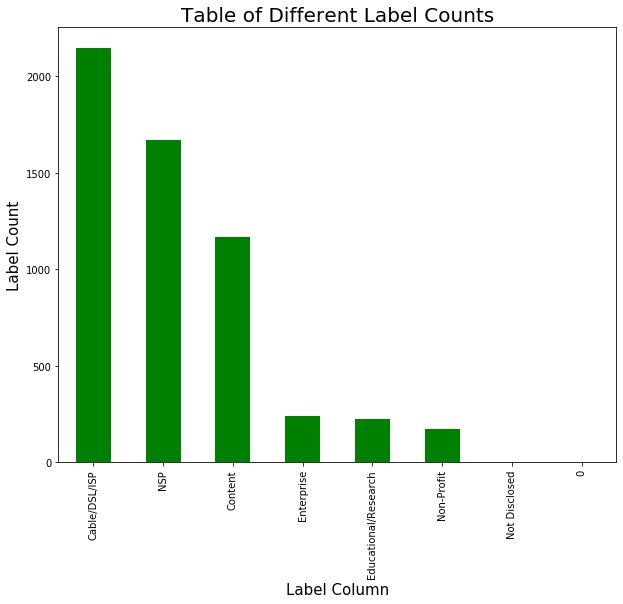

In [333]:
df_label = df_master['info_type']
plt.figure(figsize=[10,8])
df_label.value_counts().plot(kind='bar', color = 'g')
plt.xlabel('Label Column', fontsize = 15)
plt.ylabel('Label Count', fontsize = 15)
plt.title('Table of Different Label Counts', fontsize = 20)

In [338]:
xdf = df_master[~df_master['info_traffic'].isin(['Not Disclosed', 0])]
xdf

,id,approved_x,name_x,type,website_x,clli,rencode,npanxx,address1,address2,...,info_ipv6,policy_url,policy_general,policy_locations,policy_ratio,policy_contracts,policy_nopublic,policy_noprivate,date_created,date_lastupdated
0,1,Y,Equinix Ashburn (DC1-DC11),Equinix,http://www.equinix.com/,ASBNVA,EQABVA,703-723,21715 Filigree Ct,Building F,...,1,http://www.gtt.net/peering/,Restrictive,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2014-06-13 11:36:43
1,2,Y,Digital Realty San Francisco (200 Paul),"Digital Realty Trust, Inc.",http://www.e200paul.com/,SNFCCA,0,415-822,200 Paul Ave,0,...,1,0,Open,Not Required,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-22 13:49:31
2,3,Y,Telehouse New York Broadway,Telehouse America,http://www.telehouse.net,NYCMNY,0,212-785,25 Broadway,0,...,0,http://peering.dal.net,Open,Preferred,No,Not Required,N,N,2004-07-28 00:00:00,2015-01-23 15:40:44
3,4,Y,Equinix Dallas (DA1),Equinix,http://www.equinix.com/,DLLSTX,EQDLTX,214-782,1950 N Stemmons Fwy,Ste 1034,...,1,http://www.as22822.net/,Selective,Required - US,No,Not Required,N,N,2004-07-28 00:00:00,2015-12-30 16:41:06
4,5,Y,Equinix Palo Alto (SV8),Equinix,http://www.equinix.com/,PLALCA,PXPACA,650-617,529 Bryant St,0,...,1,https://extranet-es.swisscom.com/ipplus/doc/BI...,Selective,Required - International,Yes,Required,N,N,2004-07-28 00:00:00,2015-12-15 08:47:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9285,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-25 16:47:42,2015-12-26 15:50:41
9070,9289,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Private Only,N,N,2015-12-26 19:08:41,2015-12-31 11:52:34
9072,9291,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-28 09:13:21,2015-12-30 06:29:08
9078,9297,0,0,0,0,0,0,0,0,0,...,1,0,Open,Not Required,No,Not Required,N,N,2015-12-29 21:44:03,2015-12-31 13:39:24


In [339]:
x = xdf['info_traffic'].to_numpy()
x[0:3]

array(['1 Tbps+', '1 Tbps+', '100-1000Mbps'], dtype=object)

In [340]:
#drop the non disclosed and blank rows first
col = []
cnt = 0
for i in x:
    cnt += 1
    num = []
#     if isinstance(i, int):
#         print(i, type(i))
#         break
    for d in i:
        if d.isalpha(): 
            if d == 'T':
                col.append(int(i[0])*1e+12)
                break
        if d.isalpha() == False:
            if d == '+':
                k = ''.join(num).split('+')
                col.append(int(k[0])*1e+11)
                break
            num.append(d)
            k = ''.join(num).split('-')  
        if d.isalpha(): 
            act = (int(k[0])+int(k[1]))/2
            if d == 'G':
                col.append(act*1e+9)
            if d == 'M':
                col.append(act*1e+6)
            
                
    #if cnt == 7:
     #   break



In [345]:
xdf['info_traffic'] = col

C:\Users\DREADBORN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       1.000000e+12
1       1.000000e+12
2       5.500000e+08
3       1.000000e+12
4       7.500000e+11
            ...     
9066    5.500000e+08
9070    7.500000e+09
9072    3.500000e+10
9078    3.000000e+09
9079    1.000000e+07
Name: info_traffic, Length: 4229, dtype: float64

In [364]:
df_ip_prefix = df_master['info_prefixes']
df_info_traffic = xdf['info_traffic']


In [372]:
df_ip_prefix

0       11000
1          50
2           3
3         600
4        3000
        ...  
9070      150
9072       75
9073        0
9078        0
9079        0
Name: info_prefixes, Length: 5628, dtype: object

In [ ]:
#-------------------------------------------------
# above is a different method, using python merge (outer) to join the csv's
# into 1 dataset, drop all rows that had blank AS #'s
#-------------------------------------------------

In [245]:
df = pd.read_csv('master.csv', na_filter= False, index_col=None, header=0, low_memory=False, error_bad_lines=False)
df

,id,asn_peer_particpiants,name_peer_particpiants,aka_peer_particpiants,website_peer_particpiants,notes_public_peer_particpiants,notes_private_peer_particpiants,irr_as_set_peer_particpiants,info_traffic_peer_particpiants,info_ratio_peer_particpiants,...,name_peer_participants_contacts_y,telephone_peer_participants_contacts_y,email_peer_participants_contacts_y,participant_id_peer_participans_publics,public_id_peer_participans_publics,local_asn_peer_participans_publics,local_ipaddr_peer_participans_publics,speed_peer_participans_publics,protocol_peer_participans_publics,pending_peer_participans_publics
0,1,4436,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,,,,,,,,,,
1,2,20940,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,Peering,,peering@gtt.net,,,,,,,
2,3,31800,DALnet IRC Network,,http://www.dal.net,,,AS31800,100-1000Mbps,Heavy Inbound,...,DALnet Peering,INOC-31800,peering@dal.net,,,,,,,
3,4,22822,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,,,AS-LLNW,1 Tbps+,Mostly Outbound,...,DALnet Routing,INOC-31800,routing@dal.net,,,,,,,
4,5,3303,Swisscom,IP-Plus,http://www.ip-plus.net,,,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32252,35067,,,,,,,,,,...,,,,9791,597,37153,196.10.140.21,1000,IPv4,0
32253,35068,,,,,,,,,,...,,,,2927,142,43531,2001:504:13::211:11,10000,IPv4,0
32254,35069,,,,,,,,,,...,,,,6460,909,2635,103.231.152.81,10000,IPv4,0
32255,35070,,,,,,,,,,...,,,,6460,909,2635,2001:df5:b800:bb00::2635:1,10000,IPv4,0


In [51]:
#file = df.apply(pd.to_numeric, errors='coerce').replace([np.nan, np.inf, -np.inf], 0).clip(lower=0)

In [8]:
#how many unique AS's are there? 
len(df['asn_peer_particpiants'].unique())


5886

In [233]:
df.loc[[int(input())],['info_type_peer_particpiants','city_mgmt_facility', 
                 'state_mgmt_facility', 'zipcode_mgmt_facility' ]]

4436


,info_type_peer_particpiants,city_mgmt_facility,state_mgmt_facility,zipcode_mgmt_facility
4436,Cable/DSL/ISP,,,


In [53]:
#CDF of ip refixes for content, Non-profit and NSP. 

In [120]:
df = df.replace([np.nan], 0)
df

,id,asn_peer_particpiants,name_peer_particpiants,aka_peer_particpiants,website_peer_particpiants,notes_public_peer_particpiants,notes_private_peer_particpiants,irr_as_set_peer_particpiants,info_traffic_peer_particpiants,info_ratio_peer_particpiants,...,name_peer_participants_contacts_y,telephone_peer_participants_contacts_y,email_peer_participants_contacts_y,participant_id_peer_participans_publics,public_id_peer_participans_publics,local_asn_peer_participans_publics,local_ipaddr_peer_participans_publics,speed_peer_participans_publics,protocol_peer_participans_publics,pending_peer_participans_publics
0,1,4436.0,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
1,2,20940.0,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,0,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,Peering,0,peering@gtt.net,0.0,0.0,0.0,0,0.0,0,0.0
2,3,31800.0,DALnet IRC Network,0,http://www.dal.net,0,0,AS31800,100-1000Mbps,Heavy Inbound,...,DALnet Peering,INOC-31800,peering@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
3,4,22822.0,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,0,0,AS-LLNW,1 Tbps+,Mostly Outbound,...,DALnet Routing,INOC-31800,routing@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
4,5,3303.0,Swisscom,IP-Plus,http://www.ip-plus.net,0,0,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32252,35067,0.0,0,0,0,0,0,0,0,0,...,0,0,0,9791.0,597.0,37153.0,196.10.140.21,1000.0,IPv4,0.0
32253,35068,0.0,0,0,0,0,0,0,0,0,...,0,0,0,2927.0,142.0,43531.0,2001:504:13::211:11,10000.0,IPv4,0.0
32254,35069,0.0,0,0,0,0,0,0,0,0,...,0,0,0,6460.0,909.0,2635.0,103.231.152.81,10000.0,IPv4,0.0
32255,35070,0.0,0,0,0,0,0,0,0,0,...,0,0,0,6460.0,909.0,2635.0,2001:df5:b800:bb00::2635:1,10000.0,IPv4,0.0


In [64]:
df_content = df.loc[df['info_type_peer_particpiants'] == 'Content']
df_non_profit = df.loc[df['info_type_peer_particpiants'] == 'Non-Profit']
df_nsp = df.loc[df['info_type_peer_particpiants'] == 'NSP']

In [65]:
df_nsp = df_nsp['info_prefixes_peer_particpiants']
df_non_profit = df_non_profit['info_prefixes_peer_particpiants']
df_content = df_content['info_prefixes_peer_particpiants']

In [66]:
df_nsp

0        11000.0
7          500.0
9       260000.0
11           0.0
12      165000.0
          ...   
5964        10.0
5965         0.0
5985         0.0
6012         3.0
6017         0.0
Name: info_prefixes_peer_particpiants, Length: 1734, dtype: float64

C:\Users\DREADBORN\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribution of Ip prefixes for content, nonprofit and NSP')

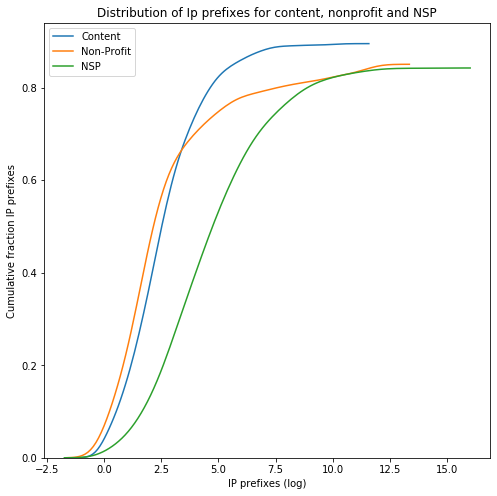

In [68]:
f, ax =plt.subplots(figsize=(8, 8))
#np.log
ax = sns.kdeplot(np.log(df_content), label = "Content", cumulative=True)
ax = sns.kdeplot(np.log(df_non_profit), label = "Non-Profit", cumulative=True)
ax = sns.kdeplot(np.log(df_nsp), label = "NSP", cumulative=True)
ax.legend()
plt.xlabel('IP prefixes (log)')
plt.ylabel('Cumulative fraction IP prefixes')
plt.title('Distribution of Ip prefixes for content, nonprofit and NSP')

In [195]:
xdf = df[~df['info_traffic_peer_particpiants'].isin(['Not Disclosed', 0])]
xdf.head(10)

,id,asn_peer_particpiants,name_peer_particpiants,aka_peer_particpiants,website_peer_particpiants,notes_public_peer_particpiants,notes_private_peer_particpiants,irr_as_set_peer_particpiants,info_traffic_peer_particpiants,info_ratio_peer_particpiants,...,name_peer_participants_contacts_y,telephone_peer_participants_contacts_y,email_peer_participants_contacts_y,participant_id_peer_participans_publics,public_id_peer_participans_publics,local_asn_peer_participans_publics,local_ipaddr_peer_participans_publics,speed_peer_participans_publics,protocol_peer_participans_publics,pending_peer_participans_publics
0,1,4436.0,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
1,2,20940.0,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,0,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,Peering,0,peering@gtt.net,0.0,0.0,0.0,0,0.0,0,0.0
2,3,31800.0,DALnet IRC Network,0,http://www.dal.net,0,0,AS31800,100-1000Mbps,Heavy Inbound,...,DALnet Peering,INOC-31800,peering@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
3,4,22822.0,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,0,0,AS-LLNW,1 Tbps+,Mostly Outbound,...,DALnet Routing,INOC-31800,routing@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
4,5,3303.0,Swisscom,IP-Plus,http://www.ip-plus.net,0,0,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
5,6,22773.0,Cox Communications,0,www.cox.com/peering,0,0,AS22773,100+ Gbps,Mostly Inbound,...,Peering,0,peering-team@llnw.com,0.0,0.0,0.0,0,0.0,0,0.0
6,7,6079.0,RCN,0,http://www.rcn.com/,"Closest-exit by default, best-exit done via ag...",Many private locations available within our me...,AS-RCN,20-50 Gbps,Balanced,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
8,9,7843.0,Time Warner Cable,TWC,0,IPv4 Maxpfx: 10000\nIPv6 Maxpfx: 200,0,AS-ROADRUNNER,1 Tbps+,Balanced,...,Peering,0,peering@cox.com,0.0,0.0,0.0,0,0.0,0,0.0
9,10,1299.0,TeliaSonera International Carrier,"Telia, Sonera, TSIC",http://www.teliasoneraic.com/,0,0,AS-TELIANET / AS-TELIANET-V6,1 Tbps+,Balanced,...,NOC Engineering,+1-855-275-6862 Option 7,cciatl-nocengineer@cox.com,0.0,0.0,0.0,0,0.0,0,0.0
10,12,7132.0,AT&T US - AS7132,"ATTIS, SBC Internet Services, SBCNT",http://www.att.com,No longer peering due to consolidation into AT...,"GigE/10GigE, OC192 options",AS-SBCIS-7132,100+ Gbps,Mostly Inbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0


In [196]:
x = xdf['info_traffic_peer_particpiants'].to_numpy()
x[0:3]

array(['1 Tbps+', '1 Tbps+', '100-1000Mbps'], dtype=object)

In [197]:
#drop the non disclosed and blank rows first
col = []
cnt = 0
for i in x:
    cnt += 1
    num = []
#     if isinstance(i, int):
#         print(i, type(i))
#         break
    for d in i:
        if d.isalpha(): 
            if d == 'T':
                col.append(int(i[0])*1e+12)
                break
        if d.isalpha() == False:
            if d == '+':
                k = ''.join(num).split('+')
                col.append(int(k[0])*1e+11)
                break
            num.append(d)
            k = ''.join(num).split('-')  
        if d.isalpha(): 
            act = (int(k[0])+int(k[1]))/2
            if d == 'G':
                col.append(act*1e+9)
            if d == 'M':
                col.append(act*1e+6)
            
                
    #if cnt == 7:
     #   break



In [203]:
xdf.head(10)

,id,asn_peer_particpiants,name_peer_particpiants,aka_peer_particpiants,website_peer_particpiants,notes_public_peer_particpiants,notes_private_peer_particpiants,irr_as_set_peer_particpiants,info_traffic_peer_particpiants,info_ratio_peer_particpiants,...,name_peer_participants_contacts_y,telephone_peer_participants_contacts_y,email_peer_participants_contacts_y,participant_id_peer_participans_publics,public_id_peer_participans_publics,local_asn_peer_participans_publics,local_ipaddr_peer_participans_publics,speed_peer_participans_publics,protocol_peer_participans_publics,pending_peer_participans_publics
0,1,4436.0,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
1,2,20940.0,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,0,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,Peering,0,peering@gtt.net,0.0,0.0,0.0,0,0.0,0,0.0
2,3,31800.0,DALnet IRC Network,0,http://www.dal.net,0,0,AS31800,100-1000Mbps,Heavy Inbound,...,DALnet Peering,INOC-31800,peering@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
3,4,22822.0,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,0,0,AS-LLNW,1 Tbps+,Mostly Outbound,...,DALnet Routing,INOC-31800,routing@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
4,5,3303.0,Swisscom,IP-Plus,http://www.ip-plus.net,0,0,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
5,6,22773.0,Cox Communications,0,www.cox.com/peering,0,0,AS22773,100+ Gbps,Mostly Inbound,...,Peering,0,peering-team@llnw.com,0.0,0.0,0.0,0,0.0,0,0.0
6,7,6079.0,RCN,0,http://www.rcn.com/,"Closest-exit by default, best-exit done via ag...",Many private locations available within our me...,AS-RCN,20-50 Gbps,Balanced,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
8,9,7843.0,Time Warner Cable,TWC,0,IPv4 Maxpfx: 10000\nIPv6 Maxpfx: 200,0,AS-ROADRUNNER,1 Tbps+,Balanced,...,Peering,0,peering@cox.com,0.0,0.0,0.0,0,0.0,0,0.0
9,10,1299.0,TeliaSonera International Carrier,"Telia, Sonera, TSIC",http://www.teliasoneraic.com/,0,0,AS-TELIANET / AS-TELIANET-V6,1 Tbps+,Balanced,...,NOC Engineering,+1-855-275-6862 Option 7,cciatl-nocengineer@cox.com,0.0,0.0,0.0,0,0.0,0,0.0
10,12,7132.0,AT&T US - AS7132,"ATTIS, SBC Internet Services, SBCNT",http://www.att.com,No longer peering due to consolidation into AT...,"GigE/10GigE, OC192 options",AS-SBCIS-7132,100+ Gbps,Mostly Inbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0


In [206]:
xdf['info_traffic_peer_particpiants'] = col
xdf.head(10)

C:\Users\DREADBORN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,asn_peer_particpiants,name_peer_particpiants,aka_peer_particpiants,website_peer_particpiants,notes_public_peer_particpiants,notes_private_peer_particpiants,irr_as_set_peer_particpiants,info_traffic_peer_particpiants,info_ratio_peer_particpiants,...,name_peer_participants_contacts_y,telephone_peer_participants_contacts_y,email_peer_participants_contacts_y,participant_id_peer_participans_publics,public_id_peer_participans_publics,local_asn_peer_participans_publics,local_ipaddr_peer_participans_publics,speed_peer_participans_publics,protocol_peer_participans_publics,pending_peer_participans_publics
0,1,4436.0,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1.000000e+12,Mostly Outbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
1,2,20940.0,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,0,AS-AKAMAI,1.000000e+12,Heavy Outbound,...,Peering,0,peering@gtt.net,0.0,0.0,0.0,0,0.0,0,0.0
2,3,31800.0,DALnet IRC Network,0,http://www.dal.net,0,0,AS31800,5.500000e+08,Heavy Inbound,...,DALnet Peering,INOC-31800,peering@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
3,4,22822.0,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,0,0,AS-LLNW,1.000000e+12,Mostly Outbound,...,DALnet Routing,INOC-31800,routing@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
4,5,3303.0,Swisscom,IP-Plus,http://www.ip-plus.net,0,0,AS-SWCMGLOBAL,7.500000e+11,Mostly Inbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
5,6,22773.0,Cox Communications,0,www.cox.com/peering,0,0,AS22773,1.000000e+13,Mostly Inbound,...,Peering,0,peering-team@llnw.com,0.0,0.0,0.0,0,0.0,0,0.0
6,7,6079.0,RCN,0,http://www.rcn.com/,"Closest-exit by default, best-exit done via ag...",Many private locations available within our me...,AS-RCN,3.500000e+10,Balanced,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
8,9,7843.0,Time Warner Cable,TWC,0,IPv4 Maxpfx: 10000\nIPv6 Maxpfx: 200,0,AS-ROADRUNNER,1.000000e+12,Balanced,...,Peering,0,peering@cox.com,0.0,0.0,0.0,0,0.0,0,0.0
9,10,1299.0,TeliaSonera International Carrier,"Telia, Sonera, TSIC",http://www.teliasoneraic.com/,0,0,AS-TELIANET / AS-TELIANET-V6,1.000000e+12,Balanced,...,NOC Engineering,+1-855-275-6862 Option 7,cciatl-nocengineer@cox.com,0.0,0.0,0.0,0,0.0,0,0.0
10,12,7132.0,AT&T US - AS7132,"ATTIS, SBC Internet Services, SBCNT",http://www.att.com,No longer peering due to consolidation into AT...,"GigE/10GigE, OC192 options",AS-SBCIS-7132,1.000000e+13,Mostly Inbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0


In [211]:
df = xdf

28

In [212]:
df_content = df.loc[df['info_type_peer_particpiants'] == 'Content']
df_non_profit = df.loc[df['info_type_peer_particpiants'] == 'Non-Profit']
df_nsp = df.loc[df['info_type_peer_particpiants'] == 'NSP']

In [213]:
df_nsp = df_nsp['info_traffic_peer_particpiants']
df_non_profit = df_non_profit['info_traffic_peer_particpiants']
df_content = df_content['info_traffic_peer_particpiants']

In [214]:
df_nsp

0       1.000000e+12
9       1.000000e+12
11      1.000000e+12
12      1.000000e+12
24      3.000000e+09
            ...     
5953    6.000000e+07
5964    3.000000e+09
5965    3.000000e+09
5985    5.500000e+08
6012    3.000000e+09
Name: info_traffic_peer_particpiants, Length: 1292, dtype: float64

Text(0.5, 1.0, 'Distribution of Traffix speeds for content, nonprofit and NSP')

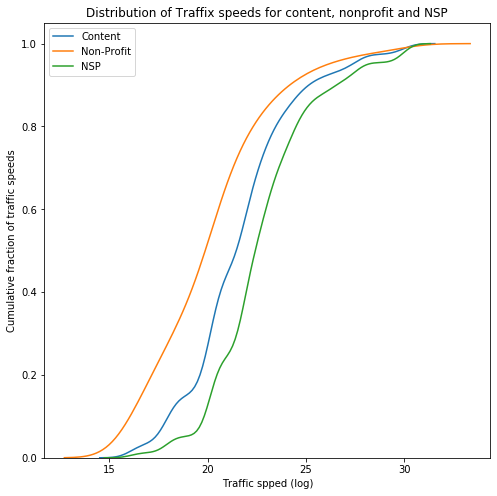

In [217]:
f, ax =plt.subplots(figsize=(8, 8))
#np.log
ax = sns.kdeplot(np.log(df_content), label = "Content", cumulative=True)
ax = sns.kdeplot(np.log(df_non_profit), label = "Non-Profit", cumulative=True)
ax = sns.kdeplot(np.log(df_nsp), label = "NSP", cumulative=True)
ax.legend()
plt.xlabel('Traffic spped (log)')
plt.ylabel('Cumulative fraction of traffic speeds')
plt.title('Distribution of Traffix speeds for content, nonprofit and NSP')